In [1]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/data.csv")

# concat contest+problem name
df["id"]=df["contest"].astype(str)+df["problem_name"]
df["id"].astype("str")

print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8343 entries, 0 to 8342
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   contest            8343 non-null   int64 
 1   problem_name       8343 non-null   object
 2   problem_statement  8336 non-null   object
 3   problem_tags       8279 non-null   object
 4   id                 8343 non-null   object
dtypes: int64(1), object(4)
memory usage: 326.0+ KB
None


,contest,problem_name,problem_statement,problem_tags,id
0,325,A,You are given n rectangles. The corners of rec...,"implementation,*1500",325A
1,325,B,Daniel is organizing a football tournament. He...,"binarysearch,math,*1800",325B
2,325,C,Piegirl has found a monster and a book about m...,"dfsandsimilar,graphs,shortestpaths,*2600",325C


## Tags

In [2]:
def clean_tags_column(tags):
    _tags = str(tags).split(',')
    ret = []
    for tag in _tags:
        # remove rating tag  
        if '*' not in tag:
            ret.append(tag)
    return ret

df["tags"]=df["problem_tags"].apply(clean_tags_column)
df.head()

,contest,problem_name,problem_statement,problem_tags,id,tags
0,325,A,You are given n rectangles. The corners of rec...,"implementation,*1500",325A,[implementation]
1,325,B,Daniel is organizing a football tournament. He...,"binarysearch,math,*1800",325B,"[binarysearch, math]"
2,325,C,Piegirl has found a monster and a book about m...,"dfsandsimilar,graphs,shortestpaths,*2600",325C,"[dfsandsimilar, graphs, shortestpaths]"
3,325,D,"In a far away land, there exists a planet shap...","dsu,*2900",325D,[dsu]
4,325,E,Piegirl found the red button. You have one las...,"combinatorics,dfsandsimilar,dsu,graphs,greedy,...",325E,"[combinatorics, dfsandsimilar, dsu, graphs, gr..."


implementation            2221
math                      2028
greedy                    1950
dp                        1673
datastructures            1290
constructivealgorithms    1181
bruteforce                1173
graphs                     901
binarysearch               786
sortings                   759
Name: tags, dtype: int64


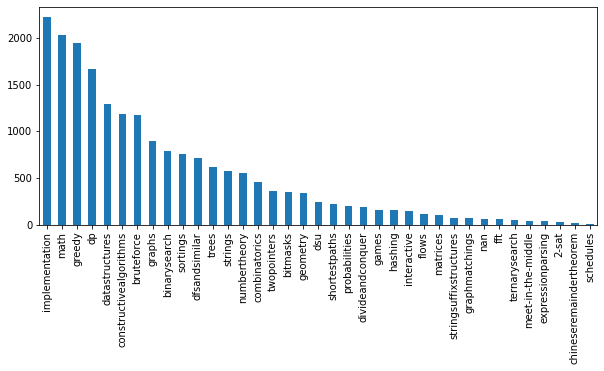

In [3]:
# tag stats
# https://stackoverflow.com/a/71887174/3413574
tag_stats = df["tags"].explode().value_counts()
tag_stats.plot(kind="bar", figsize=(10,4))
print(tag_stats.head(10))

In [4]:
clean_df = df[["id","problem_statement","tags"]]
clean_df.head()

,id,problem_statement,tags
0,325A,You are given n rectangles. The corners of rec...,[implementation]
1,325B,Daniel is organizing a football tournament. He...,"[binarysearch, math]"
2,325C,Piegirl has found a monster and a book about m...,"[dfsandsimilar, graphs, shortestpaths]"
3,325D,"In a far away land, there exists a planet shap...",[dsu]
4,325E,Piegirl found the red button. You have one las...,"[combinatorics, dfsandsimilar, dsu, graphs, gr..."


In [5]:
# save df as pickle

## Problem_statement

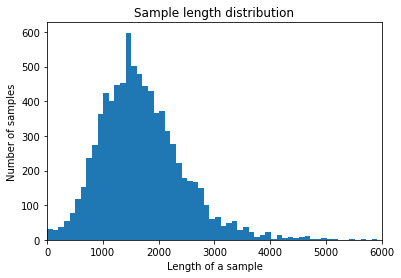

In [6]:
samples = df["problem_statement"].values

plt.hist([len(str(s)) for s in samples], 100)
plt.xlim(0,6000)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

## Train/Test split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
l = len(clean_df)/10*8
train, test = clean_df.loc[:l],clean_df.loc[l:]
X_train, y_train = train["problem_statement"], train["tags"] 
X_test, y_test = test["problem_statement"], test["tags"] 
print(X_train.shape,X_test.shape)

(6675,) (1668,)
